In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Stress Level Factors

## Preprocessing

In [62]:
stress_level_df = pd.read_csv('StressLevelDataset.csv')
stress_level_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


### Encoding Categorical Data

In [63]:
label_encoder = LabelEncoder()

df_columns = stress_level_df.columns.tolist()

for column in df_columns:
    stress_level_df[column]= label_encoder.fit_transform(stress_level_df[column])

### Normalizing Data

In [64]:
scaled_features = stress_level_df.copy()

scaler = StandardScaler()

df_columns = stress_level_df.columns.tolist()

for column in df_columns:
    stress_level_df[[column]]= scaler.fit_transform(stress_level_df[[column]])

scaled_features = pd.DataFrame(scaled_features)

scaled_features.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [65]:
X = scaled_features.drop(['stress_level'], axis = 1).values
y = scaled_features['stress_level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Decision Trees

### Making Predictions

In [66]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

### Visualizing Results

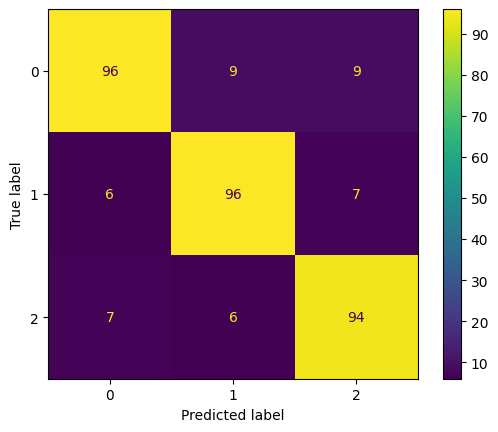

In [67]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

## KNN

### Making Predictions

In [68]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

### Visualizing Results

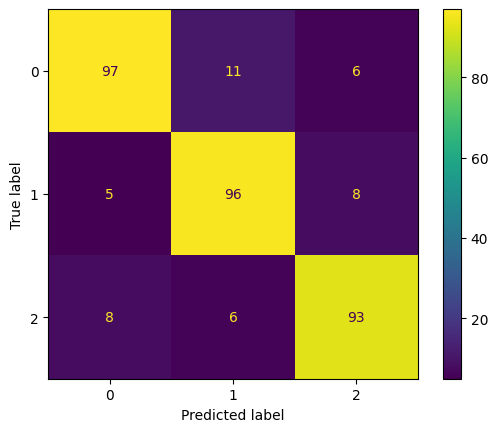

In [69]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

## K-Means

### Testing Number of Clusters

In [70]:
distortions_ = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
    kmeans.fit(scaled_features)
    distortions_.append(kmeans.inertia_)

min_distortion = min(distortions_)

best_num_clusters = distortions_.index(min_distortion)

print('The best number of clusters among the 10 quantities tested is', best_num_clusters,end='.')

The best number of clusters among the 10 quantities tested is 9.

### Visualizing Results

In [71]:
cluster = KMeans(n_clusters=best_num_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(scaled_features[['anxiety_level','sleep_quality']])

cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

graf1 = px.scatter(x = scaled_features.loc[:,'anxiety_level'], y = scaled_features.loc[:,'sleep_quality'], color=cluster_assignments)
graf2 = px.scatter(x = cluster_centers[:,0], y = cluster_centers[:,1], size = [10 for _ in range(10)])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=300,title_text='K-Means Clustering')
graf3.update_xaxes(title = 'anxiety_level')
graf3.update_yaxes(title = 'sleep_quality')
graf3.show()